# Submitted by Navneet Das 3433 Comp A

***'
Mini Project 2 Deep Learning
Gender and Age Detection: predict if a person is a male or female and also their age from the Photo images
'***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
images = []
ages = []
genders = []

for i in os.listdir('../input/utkface-new/crop_part1/')[0:8000]:
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    images.append(Image.open('../input/utkface-new/crop_part1/' + i))

In [3]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')

df = pd.concat([images, ages, genders], axis=1)
df

,Images,Ages,Genders
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,26,0
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,21,1
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,17,1
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,76,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,18,1
...,...,...,...
7995,<PIL.JpegImagePlugin.JpegImageFile image mode=...,3,0
7996,<PIL.JpegImagePlugin.JpegImageFile image mode=...,28,0
7997,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0
7998,<PIL.JpegImagePlugin.JpegImageFile image mode=...,8,1


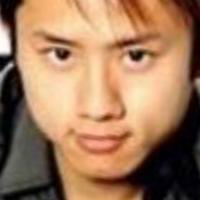

26 0


In [4]:
display(df['Images'][0])
print(df['Ages'][0], df['Genders'][0])

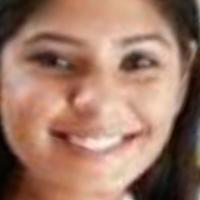

21 1


In [5]:
display(df['Images'][1])
print(df['Ages'][1], df['Genders'][1])

So 0 corresponds to male, 1 corresponds to female.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ages', ylabel='Density'>

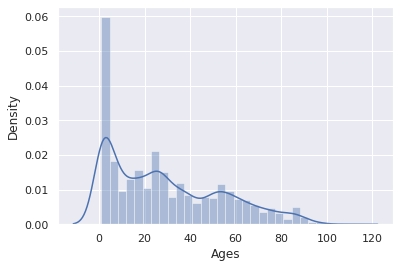

In [6]:
sns.set_theme()
sns.distplot(df['Ages'],kde=True, bins=30)

In [7]:
under4s = []

for i in range(len(df)):
    if df['Ages'].iloc[i] <= 4:
        under4s.append(df.iloc[i])
under4s = pd.DataFrame(under4s)
under4s = under4s.sample(frac=0.3)

df = df[df['Ages'] > 4]

df = pd.concat([df, under4s], ignore_index = True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ages', ylabel='Density'>

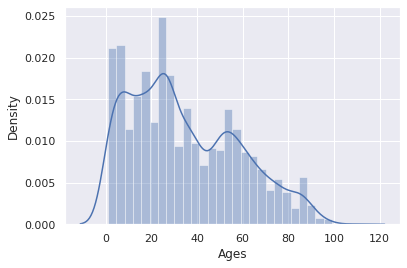

In [8]:
sns.distplot(df['Ages'],kde=True, bins=30)

In [9]:
df = df[df['Ages'] < 80]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ages', ylabel='Density'>

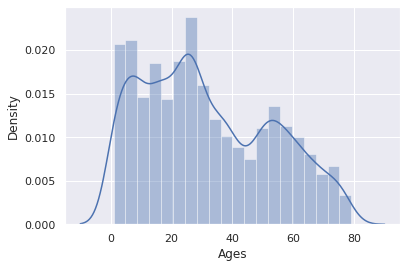

In [10]:
sns.distplot(df['Ages'],kde=True, bins=20)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Genders', ylabel='count'>

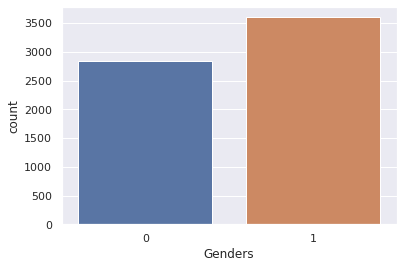

In [11]:
sns.countplot(df['Genders'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Genders', ylabel='count'>

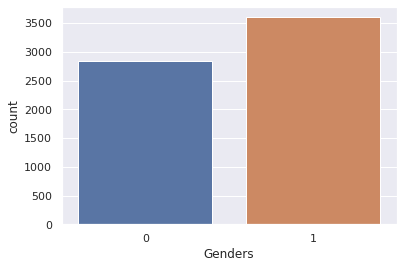

In [12]:
df = df[df['Genders'] != 3]
sns.countplot(df['Genders'])

In [13]:
x = []
y = []

for i in range(len(df)):
    df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)
    ar = np.asarray(df['Images'].iloc[i])
    x.append(ar)
    agegen = [int(df['Ages'].iloc[i]), int(df['Genders'].iloc[i])]
    y.append(agegen)
x = np.array(x)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [14]:
y_age = df['Ages']
y_gender = df['Genders']

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2, stratify=y_gender)

In [15]:
agemodel = Sequential()
agemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(64, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(128, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='relu'))

agemodel.compile(loss='mean_squared_error',
             optimizer=optimizers.Adam(lr=0.0001))

genmodel = Sequential()
genmodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(64, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(128, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Flatten())
genmodel.add(Dense(64, activation='relu'))
genmodel.add(Dropout(0.5))
genmodel.add(Dense(1, activation='sigmoid'))

genmodel.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(lr=0.0001),
             metrics=['accuracy'])

In [16]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train1 = datagen.flow(x_train_age, y_train_age, batch_size=32)

test1 = test_datagen.flow(
        x_test_age, y_test_age,
        batch_size=32)

history1 = agemodel.fit(train1, epochs=50, shuffle=True, validation_data=test1)

Epoch 1/50
161/161 [==============================] - 44s 253ms/step - loss: 706.2857 - val_loss: 452.0310
Epoch 2/50
161/161 [==============================] - 41s 255ms/step - loss: 493.1964 - val_loss: 403.0540
Epoch 3/50
161/161 [==============================] - 42s 262ms/step - loss: 439.5375 - val_loss: 419.8955
Epoch 4/50
161/161 [==============================] - 41s 257ms/step - loss: 382.1004 - val_loss: 328.3317
Epoch 5/50
161/161 [==============================] - 41s 256ms/step - loss: 376.2793 - val_loss: 306.8690
Epoch 6/50
161/161 [==============================] - 41s 255ms/step - loss: 378.7557 - val_loss: 298.7830
Epoch 7/50
161/161 [==============================] - 42s 258ms/step - loss: 353.1836 - val_loss: 364.5480
Epoch 8/50
161/161 [==============================] - 41s 257ms/step - loss: 350.4301 - val_loss: 273.9537
Epoch 9/50
161/161 [==============================] - 41s 257ms/step - loss: 347.8215 - val_loss: 281.0771
Epoch 10/50
161/161 [================

In [17]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train2 = datagen.flow(x_train_gender, y_train_gender, batch_size=64)

test2 = test_datagen.flow(
        x_test_gender, y_test_gender,
        batch_size=64)

history2 = genmodel.fit(train2, epochs=50, shuffle=True, validation_data=test2)

Epoch 1/50
81/81 [==============================] - 41s 489ms/step - loss: 0.6716 - accuracy: 0.5686 - val_loss: 0.6030 - val_accuracy: 0.6568
Epoch 2/50
81/81 [==============================] - 40s 492ms/step - loss: 0.6089 - accuracy: 0.6726 - val_loss: 0.5504 - val_accuracy: 0.7189
Epoch 3/50
81/81 [==============================] - 40s 492ms/step - loss: 0.5818 - accuracy: 0.6943 - val_loss: 0.5240 - val_accuracy: 0.7399
Epoch 4/50
81/81 [==============================] - 40s 496ms/step - loss: 0.5557 - accuracy: 0.7236 - val_loss: 0.4831 - val_accuracy: 0.7896
Epoch 5/50
81/81 [==============================] - 40s 498ms/step - loss: 0.5302 - accuracy: 0.7449 - val_loss: 0.4828 - val_accuracy: 0.7857
Epoch 6/50
81/81 [==============================] - 40s 496ms/step - loss: 0.4865 - accuracy: 0.7740 - val_loss: 0.4606 - val_accuracy: 0.8028
Epoch 7/50
81/81 [==============================] - 41s 506ms/step - loss: 0.4879 - accuracy: 0.7628 - val_loss: 0.4375 - val_accuracy: 0.8005

In [30]:
def process_and_predict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((200,200), Image.ANTIALIAS)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
            
    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 200, 200, 3)
    
    age = agemodel.predict(ar)
    gender = np.round(genmodel.predict(ar))
    if gender == 0:
        gender = 'male'
    elif gender == 1:
        gender = 'female'
        
    print('Age:', int(age), '\n Gender:', gender)
    return im.resize((300,300), Image.ANTIALIAS)

Age: 14 
 Gender: female


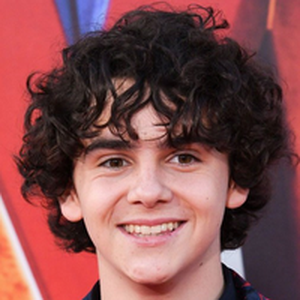

In [50]:
process_and_predict('../input/celebrities2/jack.jpg')

Age: 28 
 Gender: female


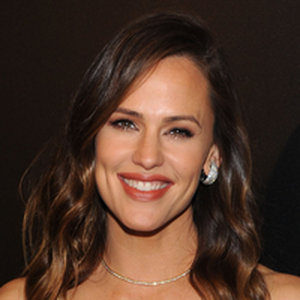

In [52]:
process_and_predict('../input/celebrities2/jennifer.jpg')

Age: 13 
 Gender: female


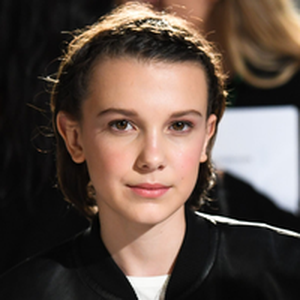

In [58]:
process_and_predict('../input/celebrities2/millie.jpg')

Age: 51 
 Gender: male


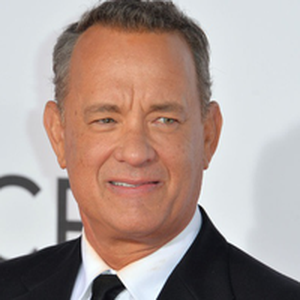

In [63]:
process_and_predict('../input/celebrities2/tom.jpg')

Age: 26 
 Gender: female


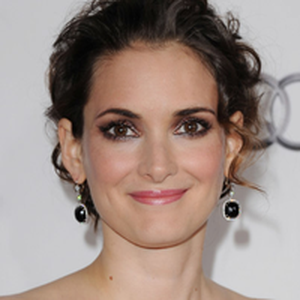

In [65]:
process_and_predict('../input/celebrities2/winona.jpg')